**Function importation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Data Loading

In [170]:
path='C:/Users/alvar/OneDrive/Escritorio/kagglecomp/train.csv'
path1='C:/Users/alvar/OneDrive/Escritorio/kagglecomp/test.csv'
df = pd.read_csv(path,index_col='id', na_values='#N/D')
test_df = pd.read_csv(path1, index_col='id')

In [171]:
test_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [172]:
test_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation


 # Original information of the dataset


The categoric variable to predict is NObeyesdad
This dataset is used for the kaggle competition: "Multi-Class Prediction of Obesity Risk"
The datasets for this competition (both train and test) were generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Note: This dataset is particularly well suited for visualizations, clustering, and general EDA. Show off your skills!


In [173]:
print (df['NObeyesdad'].unique())

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


The goal is to predict the obessity risk making use of a muticlass classifier:

* Overweight_Level_II
* Normal_Weight
* Insufficient_Weight
* Obesity_Type_III
* Obesity_Type_II
* Overweight_Level_I
* Obesity_Type_I



The main features are:

* Gender: masculine or feminine

* Age: The age of the person. This is a continuous numerical variable that represents how many years old the person is.

* Height: The person's height, probably in meters or centimeters. It's another continuous numerical variable.

* Weight: The person's weight, possibly in kilograms or pounds. It's a continuous numerical variable.

* family_history_with_overweight: Family history of overweight. This feature could indicate whether there is a history of overweight or obesity in the person's family, which can be a significant risk factor. It's probably a categorical variable (yes/no).

* FAVC: Frequency of consumption of high-calorie foods. This feature could be related to the frequency with which the person eats foods that are high in calories. It's probably a categorical variable (yes/no).

* FCVC: Frequency of vegetable consumption. Indicates how often the person eats vegetables, being a possible categorical or ordinal numerical variable.

* NCP: Number of main meals. Refers to the number of main meals the person has in a day. It could be a numerical or ordinal categorical variable.

* CAEC: Consumption of food between meals. This feature refers to how much the person eats between main meals. It could be a categorical variable describing the frequency.

* SMOKE: Indicates whether the person smokes or not. It's probably a binary categorical variable (yes/no).

* CH2O: Daily water intake. This feature likely represents the amount of water the person drinks each day, possibly in liters. It would be a continuous numerical variable.

* SCC: Monitoring of calorie consumption. It could refer to whether the person keeps a record of their caloric intake or not, being a categorical variable (yes/no).

* FAF: Frequency of physical activity. Indicates how often the person engages in physical activity. It could be numerical (for example, number of times per week) or ordinal categorical.

* TUE: Time using electronic devices. Refers to the amount of time the person spends using electronic devices, probably in hours per day. It's a continuous numerical variable.

* CALC: Alcohol consumption. Indicates the frequency of alcohol consumption by the person. It can be a categorical variable reflecting consumption frequency.

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             20758

# Data preprocessing

* Cleaning


***Null values***

In [175]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**CATEGORIC VARIABLES**

We check the categoric variables

In [176]:
import pandas as pd

# Iterate through all the columns of the dataset
for column in df.columns:
    # If the column is not numerical, ignore it
    if df[column].dtype == 'object':
        print(f"Distribution of categorical variable '{column}':")
        print(df[column].value_counts())
        print("\n")  # Add a new line for easier reading

Distribución de la variable categórica 'Gender':
Gender
Female    10422
Male      10336
Name: count, dtype: int64


Distribución de la variable categórica 'family_history_with_overweight':
family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64


Distribución de la variable categórica 'FAVC':
FAVC
yes    18982
no      1776
Name: count, dtype: int64


Distribución de la variable categórica 'CAEC':
CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64


Distribución de la variable categórica 'SMOKE':
SMOKE
no     20513
yes      245
Name: count, dtype: int64


Distribución de la variable categórica 'SCC':
SCC
no     20071
yes      687
Name: count, dtype: int64


Distribución de la variable categórica 'CALC':
CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64


Distribución de la variable categórica 'MTRANS':
MTRANS
Public_Transportation    16687
Automobile           

C:\Users\alvar\AppData\Local\Temp\ipykernel_17444\2491908428.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=variable, data=cat, order=orden, ax=ax[cada], palette='viridis')
C:\Users\alvar\AppData\Local\Temp\ipykernel_17444\2491908428.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=variable, data=cat, order=orden, ax=ax[cada], palette='viridis')
C:\Users\alvar\AppData\Local\Temp\ipykernel_17444\2491908428.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=variable, data=cat, order=orden, ax=ax[cada], palette='viridis'

C:\Users\alvar\AppData\Local\Temp\ipykernel_17444\2491908428.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=variable, data=cat, order=orden, ax=ax[cada], palette='viridis')
C:\Users\alvar\AppData\Local\Temp\ipykernel_17444\2491908428.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=variable, data=cat, order=orden, ax=ax[cada], palette='viridis')
C:\Users\alvar\AppData\Local\Temp\ipykernel_17444\2491908428.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=variable, data=cat, order=orden, ax=ax[cada], palette='viridis'

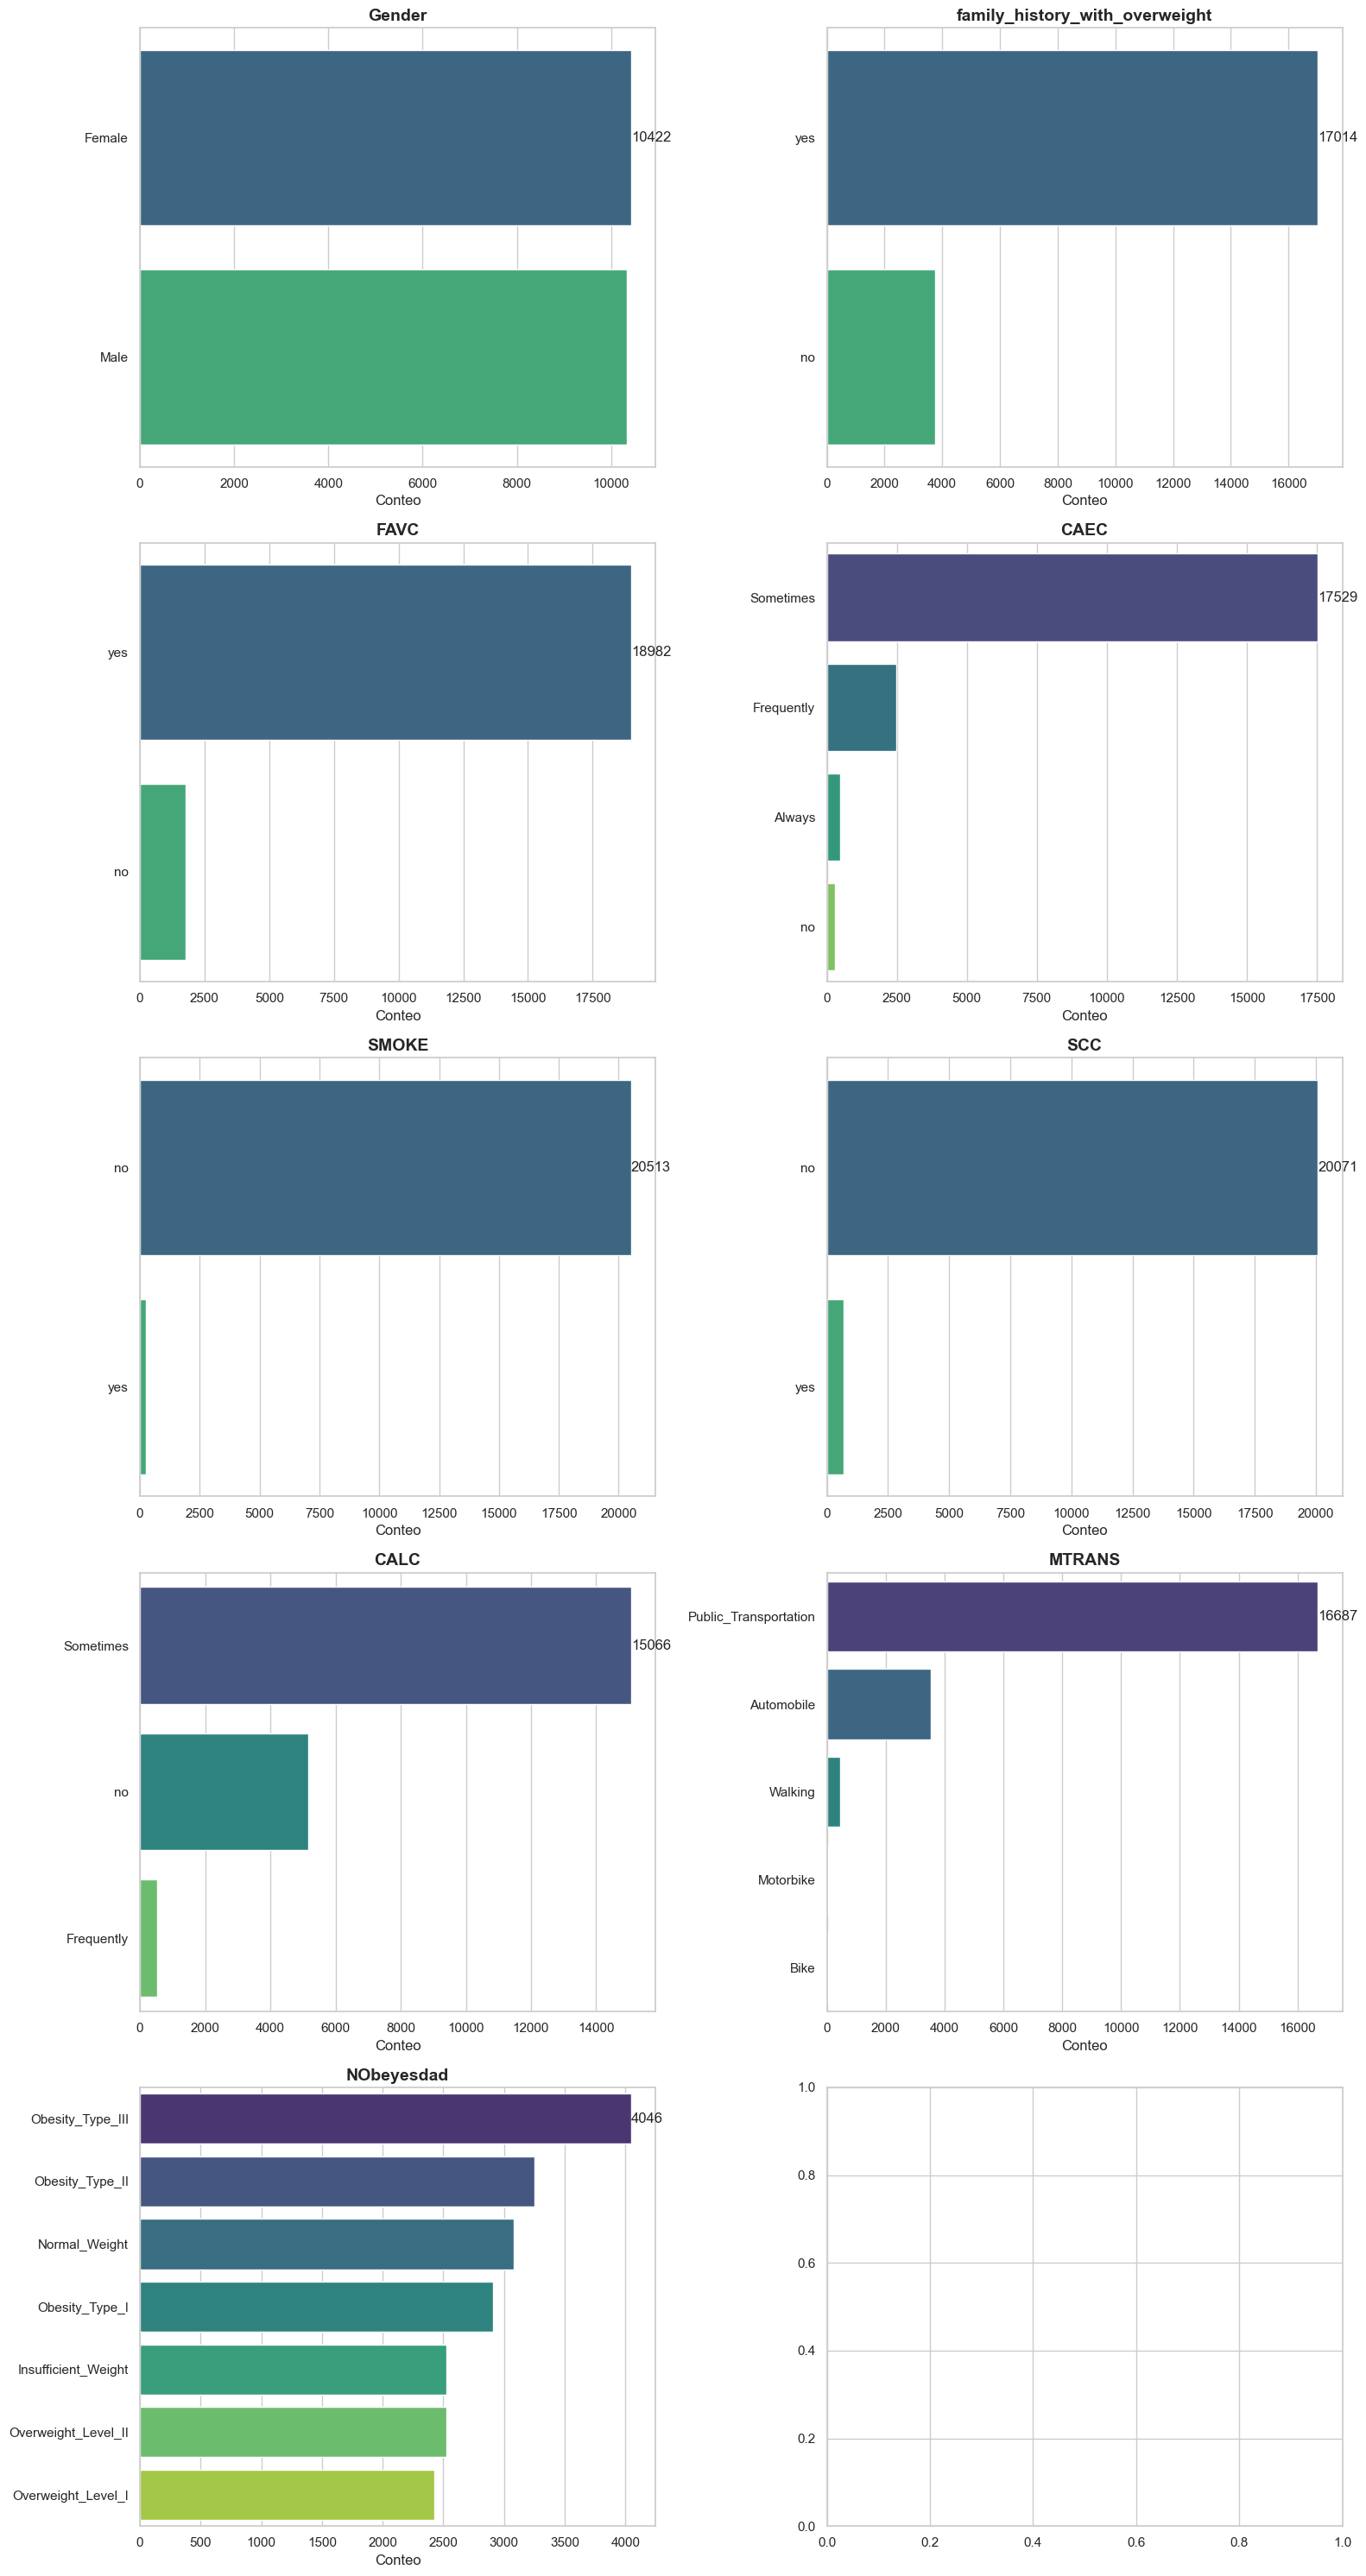

In [177]:
def categoric_graph_EDA(cat):
    # We calculate the number of rows needed
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    # We define the style of the graph
    sns.set(style="whitegrid")
    plt.rcParams.update({'font.size': 12, 'figure.figsize': (16, rows * 6)})

    #We create the space for the graphs
    f, ax = plt.subplots(nrows=rows, ncols=2)
    ax = ax.flat

    # We create the loop to add graphics
    for cada, variable in enumerate(cat):

        # We sort the categories by count
        orden = cat[variable].value_counts().index
        sns.countplot(y=variable, data=cat, order=orden, ax=ax[cada], palette='viridis')

        ax[cada].set_title(variable, fontsize=14, fontweight="bold")
        ax[cada].set_xlabel('Conteo')
        ax[cada].set_ylabel('')
        ax[cada].bar_label(ax[cada].containers[0])

    # We adjust the layout to avoid overlaps
    plt.tight_layout()
    plt.show()

categoric_graph_EDA(df.select_dtypes('object'))


Conclusions after graphing:

* Gender seems to be equally distributed

* There is a significant overweigth backgorund

* Most of the sample consumes high-calorie food frequently

* Almost all sample eats among meals

* There are no smokers

* Almost nobody registries their calorie consumption

* The majority does not consume alcohol or It is consumed sometimes

* Public transport is mainly used. Motorbike or bike are not used

* Obesity Type III is the most predominant type of obesity

**NUMERIC VARIABLES**

Let's do an exploratory analysis

In [178]:
# Function to make statistics of numerical variables

def statistics_cont(num):
    #We calculate the main statistics
    statistics = num.describe().T
    #We add the median
    statistics['median'] = num.median()
    statistics = statistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return(statistics)

statistics_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Age,20758.0,23.841804,22.815416,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,1.700000,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,84.064875,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,2.393837,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,3.000000,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,2.000000,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,1.000000,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.573887,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


The analysis of the descriptive statistics of the numerical variables shows:

* Age:
Mean and median are close, with a relatively high standard deviation.
This suggests a possibly symmetrical distribution, perhaps slightly skewed.
The distribution might be normal or nearly normal.

* Height:
Mean and median are very close, with a small standard deviation.
This suggests that most values are clustered near the mean, indicating a possible normal distribution.

* Weight:
There is a large difference between the mean and median, and the standard deviation is high.
This indicates an asymmetric distribution, possibly skewed to the right.

* FCVC (Vegetable Consumption):
The mean and median are close, but the range of values is limited (1 to 3).
It could follow a uniform or slightly skewed distribution.


* NCP (Number of Main Meals):
The mean and median are equal, with a limited range (1 to 4).
This suggests a uniform distribution or a concentration of values around the mean.


* CH2O (Water Consumption):
The mean and median are close, and the range of values is limited (1 to 3).
It could follow a uniform or normal distribution with limitations on extreme values.


* FAF (Physical Activity):
The difference between the mean and median is small, and the standard deviation is close to the mean.
This indicates a possibly asymmetric distribution, possibly skewed to the left or right.

* TUE (Time Using Electronic Devices):
The mean and median differ slightly, and the standard deviation is lower than the mean.
This could indicate an asymmetric distribution.


Statistics of Age:
count    20758.000000
mean        23.841804
std          5.688072
min         14.000000
25%         20.000000
50%         22.815416
75%         26.000000
max         61.000000
Name: Age, dtype: float64


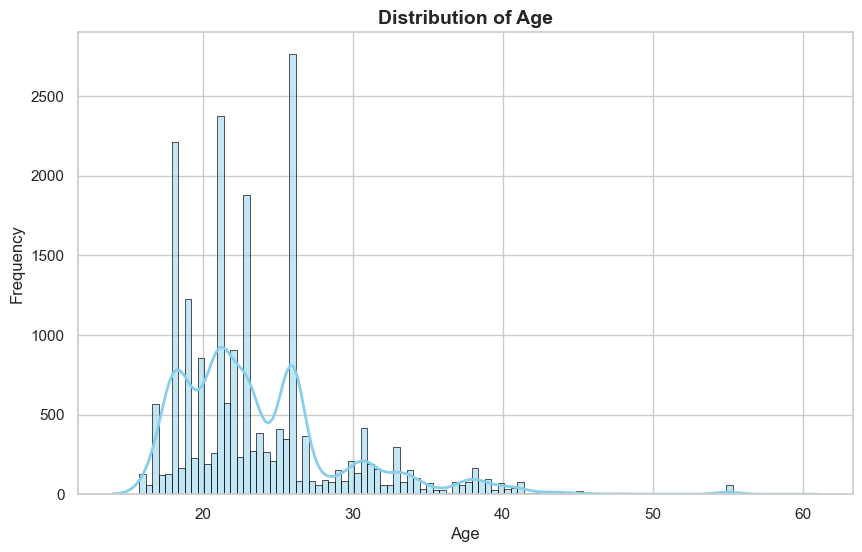

Statistics of Height:
count    20758.000000
mean         1.700245
std          0.087312
min          1.450000
25%          1.631856
50%          1.700000
75%          1.762887
max          1.975663
Name: Height, dtype: float64


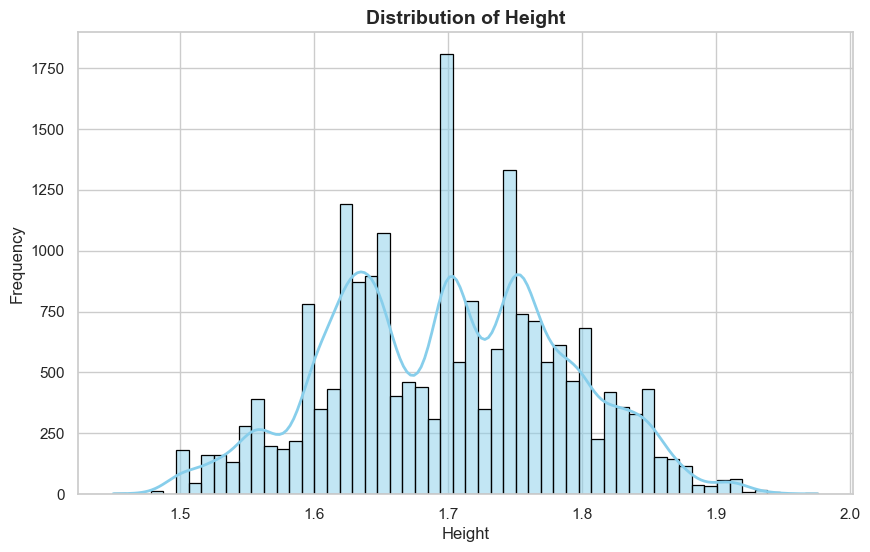

Statistics of Weight:
count    20758.000000
mean        87.887768
std         26.379443
min         39.000000
25%         66.000000
50%         84.064875
75%        111.600553
max        165.057269
Name: Weight, dtype: float64


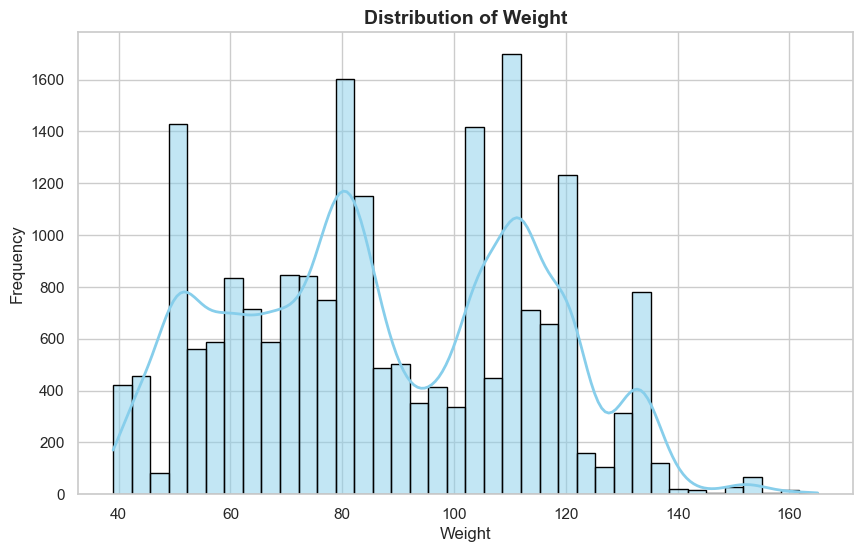

Statistics of FCVC:
count    20758.000000
mean         2.445908
std          0.533218
min          1.000000
25%          2.000000
50%          2.393837
75%          3.000000
max          3.000000
Name: FCVC, dtype: float64


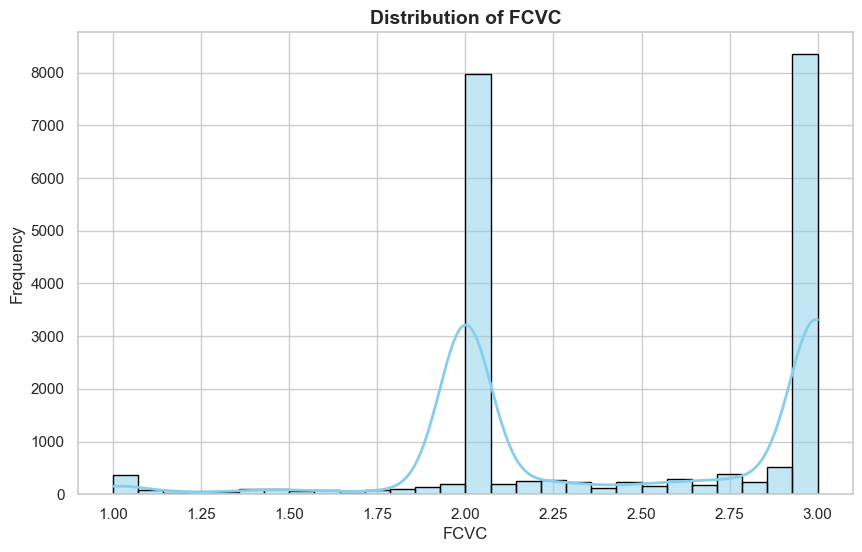

Statistics of NCP:
count    20758.000000
mean         2.761332
std          0.705375
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: NCP, dtype: float64


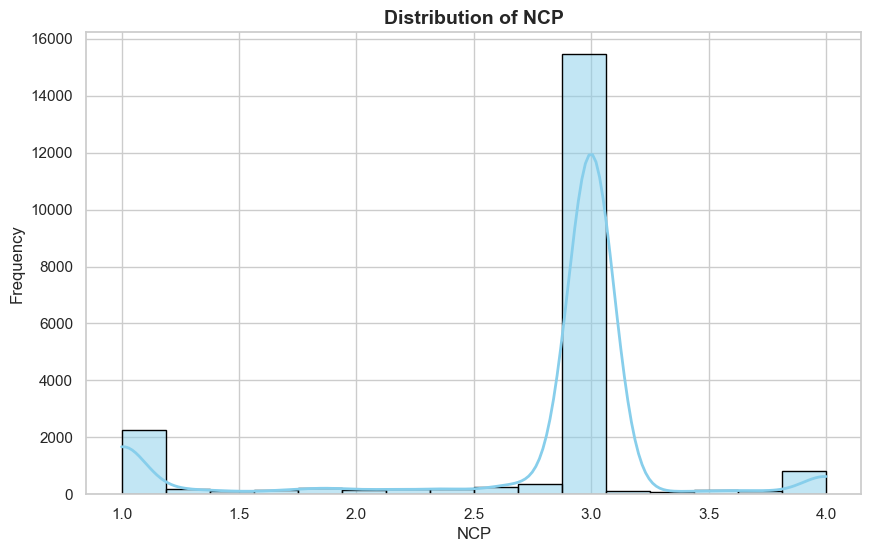

Statistics of CH2O:
count    20758.000000
mean         2.029418
std          0.608467
min          1.000000
25%          1.792022
50%          2.000000
75%          2.549617
max          3.000000
Name: CH2O, dtype: float64


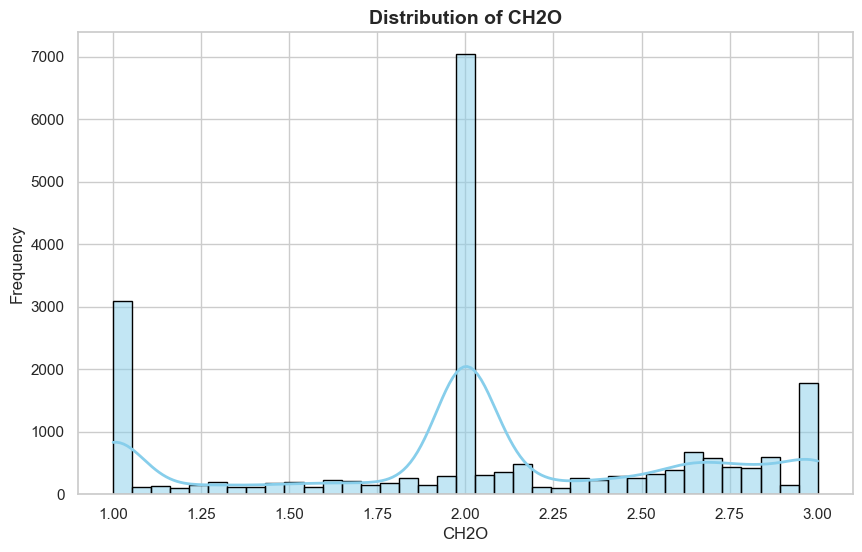

Statistics of FAF:
count    20758.000000
mean         0.981747
std          0.838302
min          0.000000
25%          0.008013
50%          1.000000
75%          1.587406
max          3.000000
Name: FAF, dtype: float64


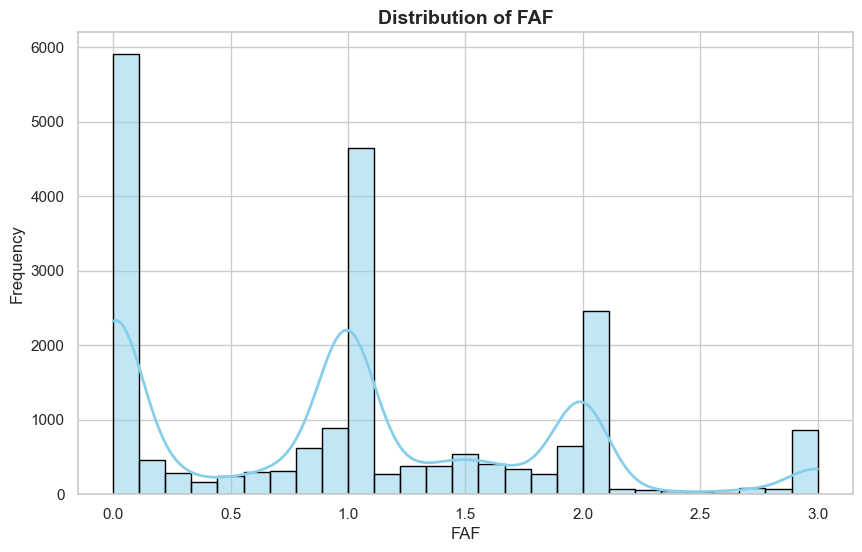

Statistics of TUE:
count    20758.000000
mean         0.616756
std          0.602113
min          0.000000
25%          0.000000
50%          0.573887
75%          1.000000
max          2.000000
Name: TUE, dtype: float64


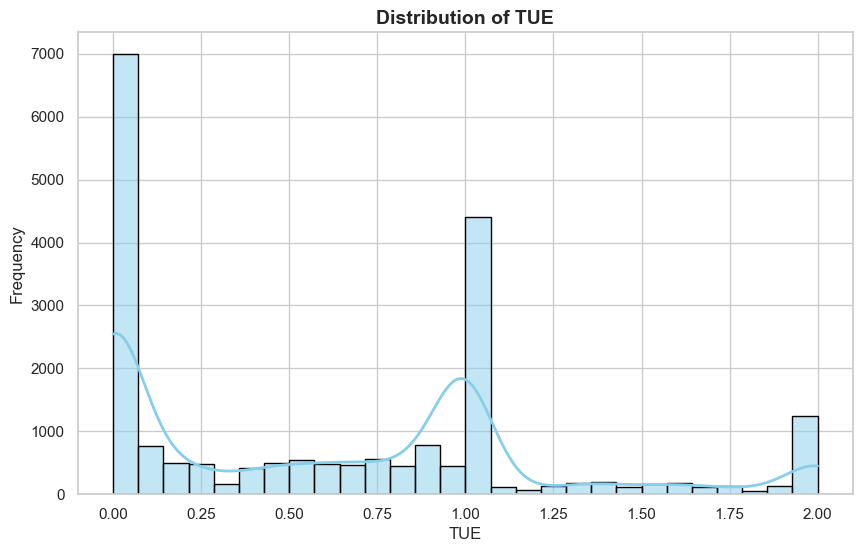

In [179]:
# Style and color configuration
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# List of numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    # Descriptive statistics
    print(f"Statistics of {column}:")
    print(df[column].describe())

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black', line_kws={"color": "black", "lw": 2})
    
    # Title and labels
    plt.title(f"Distribution of {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Display plot
    plt.show()


We can see a clear multimodal trend in the numerical variables, which leads us to think about clustering.
However, as a first step, we are not going to contemplate this method. Firstly we are going to look for an easier solution, to see how good the accurary we get is, but before, we might put some work on our categorical variables...

# Categorical variable codfication

In [180]:
# Binary categorical variables
binary_categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Binary Variables codification to 0 and 1
for col in binary_categorical_columns:
    df[col] = df[col].map({'no': 0, 'yes': 1, 'Female': 0, 'Male': 1})

# Test
for col in binary_categorical_columns:
    test_df[col] = test_df[col].map({'no': 0, 'yes': 1, 'Female': 0, 'Male': 1})

# Categorical variables with multiple categories
multiclass_categorical_columns = ['CAEC', 'CALC', 'MTRANS']

# One-Hot Encoding for multiclass categorical variables
df_encoded = pd.get_dummies(df, columns=multiclass_categorical_columns)

test_df_encoded = pd.get_dummies(test_df, columns=multiclass_categorical_columns)

# Now df_encoded has the original numerical columns plus the new One-Hot encoded columns

# Check the first rows to make sure the encoding is correct
df_encoded.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
id,,,,,,,,,,,,,,,,,,,,,
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0,2.763573,...,True,False,False,True,False,False,False,False,True,False
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0,2.000000,...,False,False,False,False,True,True,False,False,False,False
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0,1.910378,...,True,False,False,False,True,False,False,False,True,False
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0,1.674061,...,True,False,False,True,False,False,False,False,True,False
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0,1.979848,...,True,False,False,True,False,False,False,False,True,False


***SPLITTING DATA***

In [181]:
# Assuming 'df' is your DataFrame and you have already done the One-Hot encoding for your categorical variables

# We define the features and the target variableç
X=  df_encoded.drop('NObeyesdad', axis=1)

# or select specific columns if characteristics selection has taken place 
y = df_encoded['NObeyesdad']

# We split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.90      0.92       524
      Normal_Weight       0.83      0.88      0.85       626
     Obesity_Type_I       0.89      0.87      0.88       543
    Obesity_Type_II       0.98      0.98      0.98       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.76      0.73      0.74       484
Overweight_Level_II       0.78      0.79      0.78       514

           accuracy                           0.89      4152
          macro avg       0.88      0.88      0.88      4152
       weighted avg       0.89      0.89      0.89      4152



***FEATURE IMPORTANCE WITH RANDOM FOREST***

       Value                         Feature
3   0.362949                          Weight
1   0.098207                             Age
2   0.094648                          Height
6   0.089655                            FCVC
0   0.070765                          Gender
12  0.046285                             TUE
9   0.042821                            CH2O
11  0.039384                             FAF
7   0.030227                             NCP
4   0.026974  family_history_with_overweight
18  0.013795                  CALC_Sometimes
19  0.013356                         CALC_no
14  0.012574                 CAEC_Frequently
15  0.011732                  CAEC_Sometimes
5   0.011173                            FAVC
23  0.009710    MTRANS_Public_Transportation
20  0.007204               MTRANS_Automobile
10  0.004720                             SCC
16  0.003728                         CAEC_no
17  0.003150                 CALC_Frequently
13  0.002900                     CAEC_Always
24  0.0024

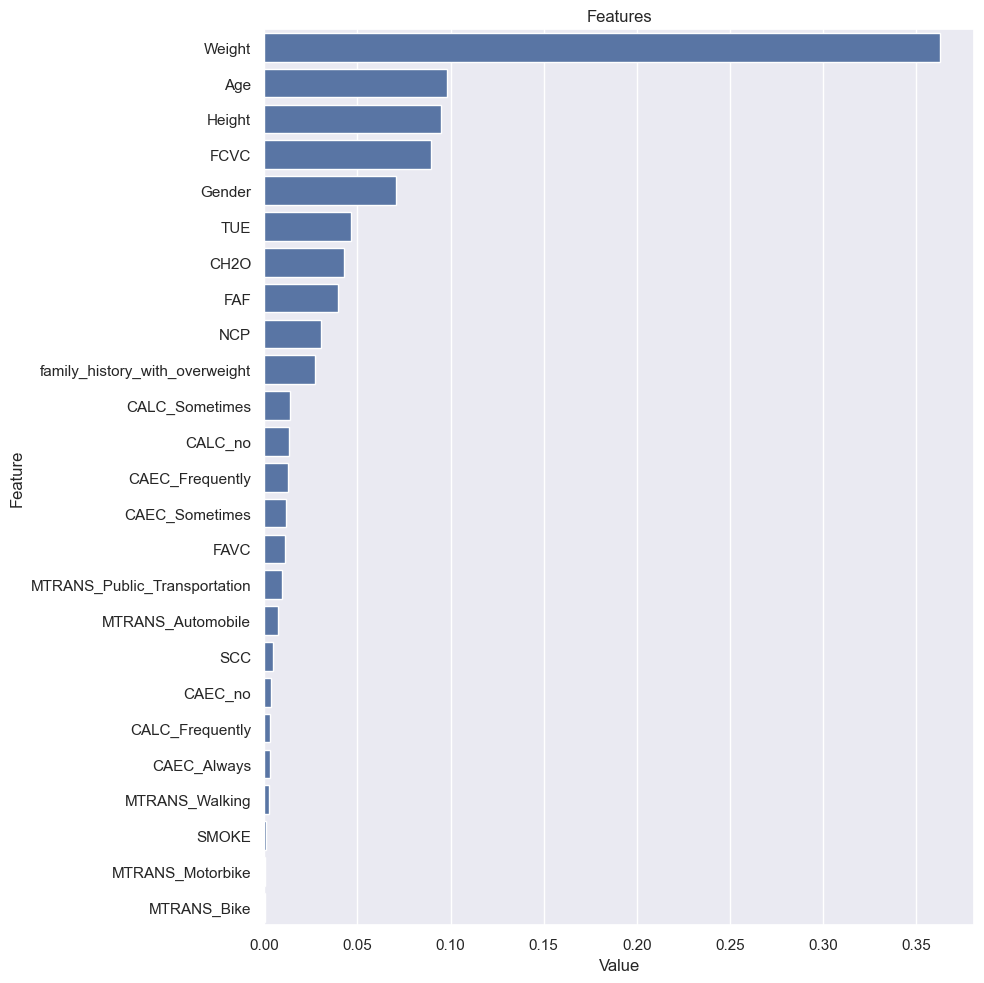

In [182]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_classifier, X)

As we can see, Weight is the most important feature, followed by Age Height and FCVC
Now that we know the importance of every feature on the target, we are going to select some variables to train the model again bases on that importance.
Also, we are going to drop MTRANS_Bike, MTRANS_Motorbike, Smoke,


# We create the submission file format

In [183]:
X.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [184]:
test_df_encoded=test_df_encoded.drop(['CALC_Always'], axis=1)

In [185]:
test_df_encoded.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [186]:
# Predict the target variable using the trained model
predictions = rf_classifier.predict(test_df_encoded)  # Make sure 'model' is your trained model

# Create the submission DataFrame
submission_df = pd.DataFrame({
    'id': test_df_encoded.index,  
    'NObeyesdad': predictions
})

# Save the DataFrame as a .csv file
submission_df.to_csv('sample_submission4.csv', index=False)